In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(0)
n_samples = 100
mean = [0,0]
cov = [[1,0.8],[0.8,1]]
data = np.random.multivariate_normal(mean, cov, size=n_samples).T

x=data[0]


In [3]:
trace=0
with pm.Model() as model:
    rho = pm.Uniform('rho', lower=-1, upper=1)
    sigma_x = pm.HalfNormal('sigma_x',sd=1)
    sigma_y = pm.HalfNormal('sigma_y',sd=1)

    cov_matrix  = pm.math.stack(([sigma_x**2, rho*sigma_x*sigma_y],[rho*sigma_x*sigma_y, sigma_y**2]))
    bivariate_normal = pm.MvNormal('bivariate_normal', mu=[0,0], cov=cov_matrix, observed=data.T)
    trace = pm.sample(1000, tune=1000, cores=1)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma_y, sigma_x, rho]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


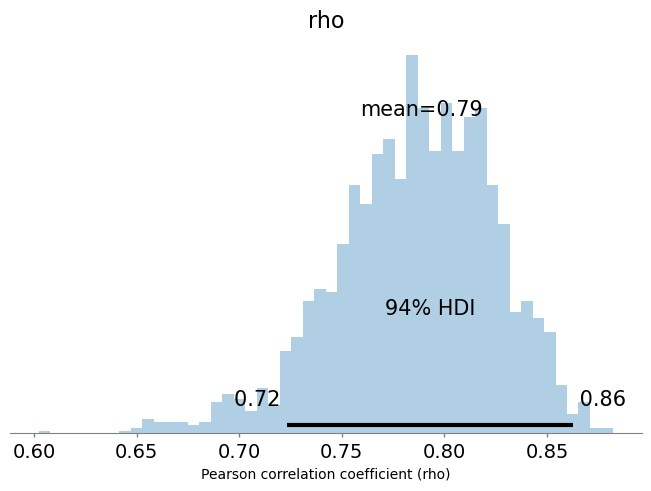

In [4]:
pm.plot_posterior(trace,var_names=['rho'], kind='hist',bins=50)
plt.xlabel('Pearson correlation coefficient (rho)')
plt.show()